# LinReg - latihan

In [161]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression

bikin data random

In [162]:
np.random.seed(42)

data_size = 50
experience = np.random.randint(1, 21, size=data_size)
education = np.random.randint(1, 5, size=data_size)
noise = np.random.normal(0, 500000, size=data_size)
salary = np.round(1000000*experience + 500000*education + noise).astype(int)

datarandom = pd.DataFrame(
    {
        "Experience":experience,
        "Education": education,
        "Salary" : salary
    }
)

datarandom

,Experience,Education,Salary
0,7,4,8661539
1,20,4,22305838
2,15,2,16515500
3,11,2,12465640
4,8,2,8580391
5,7,2,7845394
6,19,2,20165632
7,11,4,13487773
8,11,2,11760413
9,4,1,4407171


preprocessing

In [163]:
x = datarandom[["Experience", "Education"]]
y = datarandom[["Salary"]]

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

x_scale = scaler_x.fit_transform(x)
y_scale = scaler_y.fit_transform(y).ravel()

x_train, x_test, y_train, y_test = train_test_split(x_scale, y_scale, test_size=0.3, random_state=42)

x_train

array([[0.94736842, 0.33333333],
       [0.31578947, 0.        ],
       [0.68421053, 0.        ],
       [0.84210526, 0.        ],
       [0.05263158, 0.33333333],
       [0.15789474, 0.        ],
       [0.        , 0.33333333],
       [0.94736842, 0.66666667],
       [0.15789474, 0.        ],
       [0.42105263, 0.        ],
       [0.31578947, 1.        ],
       [0.73684211, 0.66666667],
       [0.10526316, 0.33333333],
       [0.89473684, 0.66666667],
       [0.31578947, 0.33333333],
       [0.94736842, 0.        ],
       [0.10526316, 0.33333333],
       [0.89473684, 0.33333333],
       [1.        , 1.        ],
       [0.78947368, 0.66666667],
       [0.73684211, 0.33333333],
       [0.36842105, 0.        ],
       [0.68421053, 1.        ],
       [0.73684211, 0.33333333],
       [0.73684211, 1.        ],
       [0.36842105, 0.66666667],
       [0.73684211, 1.        ],
       [0.57894737, 0.33333333],
       [0.89473684, 0.        ],
       [0.47368421, 1.        ],
       [0.

linreg

In [164]:
model_linreg = LinearRegression()

model_linreg.fit(x_train, y_train)
y_pred = model_linreg.predict(x_test)

y_pred

array([0.57899619, 0.97751686, 0.32992078, 0.05785446, 0.57899619,
       0.15620687, 0.90471087, 0.57899619, 0.28138345, 0.80380295,
       0.03230804, 0.33119854, 0.35674496, 0.48064379, 0.48064379])

In [165]:
y_test

array([0.61552439, 1.        , 0.37225737, 0.07140196, 0.56623832,
       0.12862297, 0.90452673, 0.57476178, 0.26669953, 0.84163798,
       0.06035633, 0.3151955 , 0.3731285 , 0.47181979, 0.50655404])

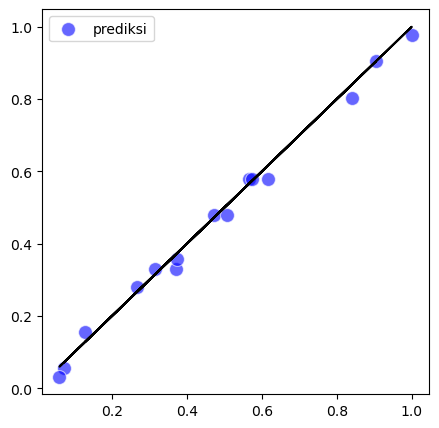

In [166]:
plt.figure(figsize=(5, 5))  
sns.scatterplot(x=y_test, y=y_pred, 
                color="blue", alpha = 0.6, 
                s=100, label="prediksi")
plt.plot(y_test, y_test, color="black", label="Actual")

plt.show()

In [167]:
model_linreg.score(x_test, y_test) #pakai R square

0.992814325133279

input data baru ke DF

In [168]:
datatambahan = pd.DataFrame(
    {
        "Experience":[1,10,5],
        "Education": [1,2,2],
    }
)

datatambahan_scale = scaler_x.fit_transform(datatambahan)
prediction_norm = model_linreg.predict(datatambahan_scale)

prediction_norm

array([-0.0417757 ,  0.97751686,  0.45169098])

In [169]:
prediction_real = scaler_y.inverse_transform(prediction_norm.reshape(-1,1))

prediction_real

array([[ 1332624.81195457],
       [22027835.41710986],
       [11351727.68374245]])

ravel-> ngubah 2D jadi 1D (bisa juga pakai flattern),
reshape-> ngubah 1D jadi 2D

In [170]:
datatambahan['Salary'] = np.round(prediction_real.ravel()).astype(int)

datatambahan

,Experience,Education,Salary
0,1,1,1332625
1,10,2,22027835
2,5,2,11351728


# Assignment

nomor 1 dan 2

In [171]:
data_covid19new = pd.read_csv('covid19_new.csv')
data_covid19new.head()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0


In [172]:
data_covid19new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58560 entries, 0 to 58559
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      58560 non-null  object 
 1   Country_code       58316 non-null  object 
 2   Country            58560 non-null  object 
 3   Continent          58560 non-null  object 
 4   WHO_region         54168 non-null  object 
 5   New_cases          39260 non-null  float64
 6   Cumulative_cases   58560 non-null  int64  
 7   New_deaths         25084 non-null  float64
 8   Cumulative_deaths  58560 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 4.0+ MB


In [173]:
data_covid19new.isnull().sum()

Date_reported            0
Country_code           244
Country                  0
Continent                0
WHO_region            4392
New_cases            19300
Cumulative_cases         0
New_deaths           33476
Cumulative_deaths        0
dtype: int64

In [174]:
data_covid19new['Country_code'] = data_covid19new['Country_code'].fillna('Undefined')
data_covid19new['WHO_region'] = data_covid19new['WHO_region'].fillna('Undefined')
data_covid19new['New_cases'] = data_covid19new['New_cases'].fillna(0)
data_covid19new['New_deaths'] = data_covid19new['New_deaths'].fillna(0)

data_covid19new.isnull().sum()

Date_reported        0
Country_code         0
Country              0
Continent            0
WHO_region           0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [175]:
data_covid19new.duplicated().sum()

0

In [176]:
data_covid19new.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,5.856000e+04,5.856000e+04,58560.000000,5.856000e+04
mean,1.325372e+04,1.810312e+06,120.582821,2.012550e+04
std,2.212564e+05,7.851277e+06,805.691725,8.220948e+04
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,0.000000e+00,4.402750e+03,0.000000,2.900000e+01
50%,4.400000e+01,4.682750e+04,0.000000,5.845000e+02
75%,1.201000e+03,5.351678e+05,12.000000,7.118000e+03
max,4.047548e+07,1.034368e+08,47687.000000,1.197213e+06


nomor 3

In [177]:
numerical_columns = data_covid19new.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'], dtype='object')

In [178]:
categorical_columns = data_covid19new.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['Date_reported', 'Country_code', 'Country', 'Continent', 'WHO_region'], dtype='object')

In [179]:
# delete outlier

for X in numerical_columns:
    q1 = data_covid19new[X].quantile(0.25)
    q3 = data_covid19new[X].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data_mdata_covid19newall = data_covid19new[(data_covid19new[X]>lower_bound) & (data_covid19new[X]<upper_bound)]

data_covid19new.head()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,Asia,EMRO,0.0,0,0.0,0
1,2020-01-12,AF,Afghanistan,Asia,EMRO,0.0,0,0.0,0
2,2020-01-19,AF,Afghanistan,Asia,EMRO,0.0,0,0.0,0
3,2020-01-26,AF,Afghanistan,Asia,EMRO,0.0,0,0.0,0
4,2020-02-02,AF,Afghanistan,Asia,EMRO,0.0,0,0.0,0


In [180]:
# scaling 

scaler_numcovid = MinMaxScaler()
data_covid19new[['New_cases','Cumulative_cases', 'New_deaths','Cumulative_deaths']] = scaler_numcovid.fit_transform(data_covid19new[['New_cases','Cumulative_cases', 'New_deaths','Cumulative_deaths']])

# encoding
from sklearn.preprocessing import LabelEncoder
encoder_catcovid = LabelEncoder()

for col in ['Country_code', 'Country', 'Continent', 'WHO_region']:
    data_covid19new[col] = encoder_catcovid.fit_transform(data_covid19new[col])

data_covid19new['Country_encoded'] = encoder_catcovid.fit_transform(data_covid19new['Country_code'])

data_covid19new.head()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Country_encoded
0,2020-01-05,2,0,1,2,0.001605,0.0,0.067137,0.0,2
1,2020-01-12,2,0,1,2,0.001605,0.0,0.067137,0.0,2
2,2020-01-19,2,0,1,2,0.001605,0.0,0.067137,0.0,2
3,2020-01-26,2,0,1,2,0.001605,0.0,0.067137,0.0,2
4,2020-02-02,2,0,1,2,0.001605,0.0,0.067137,0.0,2


nomor 4

In [181]:
X_covid = data_covid19new[['Country_encoded', 'Cumulative_cases', 'New_deaths']] 
#tidak semua fitur dipakai, menyesuaikan suruhan di soal
y_covid = data_covid19new['Cumulative_deaths']

X_covid_train, X_covid_test, y_covid_train, y_covid_test = train_test_split(X_covid, y_covid, test_size = 0.2, random_state = 42)

print(X_covid_train.shape)
print(X_covid_test.shape)
print(y_covid_train.shape)
print(y_covid_test.shape)

(46848, 3)
(11712, 3)
(46848,)
(11712,)


nomor 5

In [182]:
linreg_covid = LinearRegression()

linreg_covid.fit(X_covid_train, y_covid_train)
y_covid_pred = linreg_covid.predict(X_covid_test)

In [183]:
y_covid_pred

array([0.01717306, 0.00514486, 0.00458093, ..., 0.0043867 , 0.00088887,
       0.00366026])

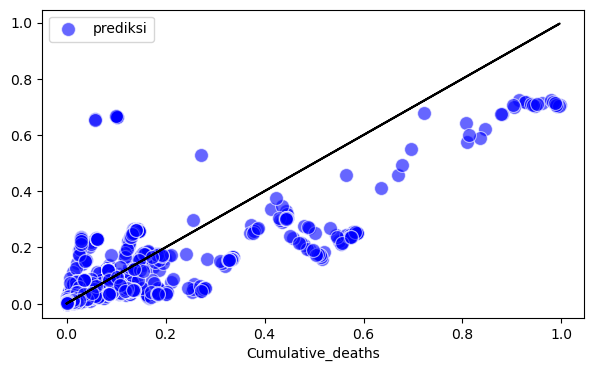

In [184]:
plt.figure(figsize=(7, 4))  
sns.scatterplot(x=y_covid_test, y=y_covid_pred, 
                color="blue", alpha = 0.6, 
                s=100, label="prediksi")
plt.plot(y_covid_test, y_covid_test, color="black", label="Actual")

plt.show()

nomor 6

In [185]:
linreg_covid.score(X_covid_test, y_covid_test) #pakai R square

0.6356641538433201

# Decision tree - latihan

In [186]:
data_death = pd.read_csv('death_clean.csv')
data_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cause            550 non-null    object
 1   Type             550 non-null    object
 2   Year             550 non-null    int64 
 3   Data Redundancy  550 non-null    int64 
 4   Total Deaths     550 non-null    int64 
 5   Source           550 non-null    object
 6   Page at Source   550 non-null    object
 7   Source URL       550 non-null    object
dtypes: int64(3), object(5)
memory usage: 34.5+ KB


In [187]:
x = data_death[['Cause', 'Type']]
y = data_death[['Total Deaths']]

x_encode = pd.get_dummies(x, columns=['Cause', 'Type'])

scaler_death = MinMaxScaler()
y_norm = scaler_death.fit_transform(y).ravel()

x_death_train, x_death_test, y_death_train, y_death_test = train_test_split(x_encode, y_norm, test_size = 0.3, random_state=42)

In [188]:
from sklearn.tree import DecisionTreeRegressor

model_DTR = DecisionTreeRegressor(random_state=42)
model_DTR.fit(x_death_train, y_death_train)

y_death_pred = model_DTR.predict(x_death_test)
y_death_pred

array([0.12955149, 0.07946554, 0.04360056, 0.06153305, 0.10873093,
       0.10873093, 0.07946554, 0.        , 0.00803697, 0.0323488 ,
       0.        , 0.60970464, 0.07946554, 0.17862166, 0.41772152,
       0.07946554, 0.        , 0.60970464, 0.01054852, 0.0323488 ,
       0.03164557, 0.27707454, 0.30098453, 0.0121894 , 0.07946554,
       0.        , 0.        , 0.02756681, 0.10423504, 0.10423504,
       0.01172058, 0.        , 0.        , 0.07946554, 0.03248945,
       0.07946554, 0.60970464, 0.27707454, 0.08415377, 0.08415377,
       0.12955149, 0.        , 0.0140647 , 0.07946554, 0.03248945,
       0.35864979, 0.10873093, 0.10423504, 0.02390999, 0.10423504,
       0.03164557, 0.02208158, 0.        , 0.        , 0.01312705,
       0.00225035, 0.10873093, 0.10873093, 0.1203171 , 0.69057665,
       0.        , 0.        , 0.01898734, 0.28691983, 0.06153305,
       0.60970464, 0.19878106, 0.35864979, 0.10873093, 0.1203171 ,
       0.07946554, 0.        , 0.01312705, 0.00843882, 0.07946

In [189]:
y_death_test

array([0.13924051, 0.04922644, 0.04781997, 0.06891702, 0.05907173,
       0.07594937, 0.12376934, 0.        , 0.        , 0.00562588,
       0.00703235, 0.83966245, 0.19690577, 0.19409283, 0.2883263 ,
       0.03656821, 0.        , 0.71589311, 0.00703235, 0.02390999,
       0.00562588, 0.23347398, 0.35161744, 0.00703235, 0.00843882,
       0.        , 0.        , 0.11533052, 0.07594937, 0.1350211 ,
       0.00140647, 0.00984529, 0.        , 0.15189873, 0.00140647,
       0.0464135 , 0.13924051, 0.20393812, 0.0323488 , 0.11814346,
       0.01828411, 0.        , 0.01265823, 0.01969058, 0.1068917 ,
       0.48101266, 0.13783404, 0.23628692, 0.04781997, 0.0281294 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00562588, 0.01265823, 0.        , 0.65682138,
       0.01125176, 0.00843882, 0.0140647 , 0.31926864, 0.37271449,
       0.46554149, 0.18002813, 0.23909986, 0.05907173, 0.17862166,
       0.01265823, 0.0604782 , 0.06188467, 0.        , 0.06047

In [190]:
model_DTR.score(x_death_test,y_death_test)

0.7503779883924386